# 신한카드 내국인 데이터 EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.set_option('display.float_format', '{:,.0f}'.format)  # scientific notation 없애고 천단위에 콤마 찍고, 소수점 없애기

In [ ]:
# 한글 깨짐 방지용

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 데이터 불러오기

In [ ]:
DATA = pd.read_csv('/content/drive/MyDrive/문화관광 데이터분석/카드데이터/NATIVE(2018.1_2022.4).txt', sep="|")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**card-native-preprocessing.ipynb 참고**

In [ ]:
DATA = DATA[DATA['cln_age_r'] != '.']  # 연령대 이상치 처리
DATA.cln_age_r = DATA.cln_age_r.astype(str)  # 연령대 변수 str 타입으로 바꾸기
DATA['cln_age_r'] = pd.Categorical(DATA['cln_age_r'], ['20','30','40','50','60'])  # 연령대 변수 순서 직접 정해주기

In [ ]:
orders = ['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']
DATA['v1'] = pd.Categorical(DATA['v1'], orders)  # 이용회원 거주지 변수 순서 직접 정해주기
DATA['v2'] = pd.Categorical(DATA['v2'], orders)  # 카드이용 가맹점 주소 변수 순서 직접 정해주기

In [ ]:
DATA['ta_ym'] = pd.to_datetime(DATA['ta_ym'], format='%Y%m')  # 년월 변수 datetime 변수로 바꾸기; 근데 뒤에 1일이 그냥 붙어지는듯

In [ ]:
DATA

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,종합쇼핑,F,30,2021-08-01,WHITE,휴식,325008700,12639
1,세종,세종,.,취미오락,종합쇼핑,M,30,2021-12-01,WHITE,휴식,599872600,20805
2,서울,세종,.,취미오락,종합쇼핑,F,50,2021-06-01,WHITE,활동,30363400,1075
3,부산,세종,.,취미오락,외식,F,30,2022-01-01,WHITE,활동,6028600,428
4,서울,세종,.,취미오락,인터넷게임,F,20,2021-08-01,WHITE,활동,630200,182
...,...,...,...,...,...,...,...,...,...,...,...,...
50905127,부산,부산,해운대구,취미오락,종합쇼핑,M,20,2018-12-01,WHITE,휴식,437760900,17836
50905128,울산,부산,해운대구,취미오락,외식,F,20,2018-12-01,WHITE,휴식,34888080,1307
50905129,강원,부산,해운대구,취미오락,종합쇼핑,M,20,2018-12-01,RED,휴식,1140301,50
50905130,경남,부산,해운대구,취미오락,외식,F,40,2018-12-01,WHITE,활동,79751806,3365


# 범주형 변수 시각화

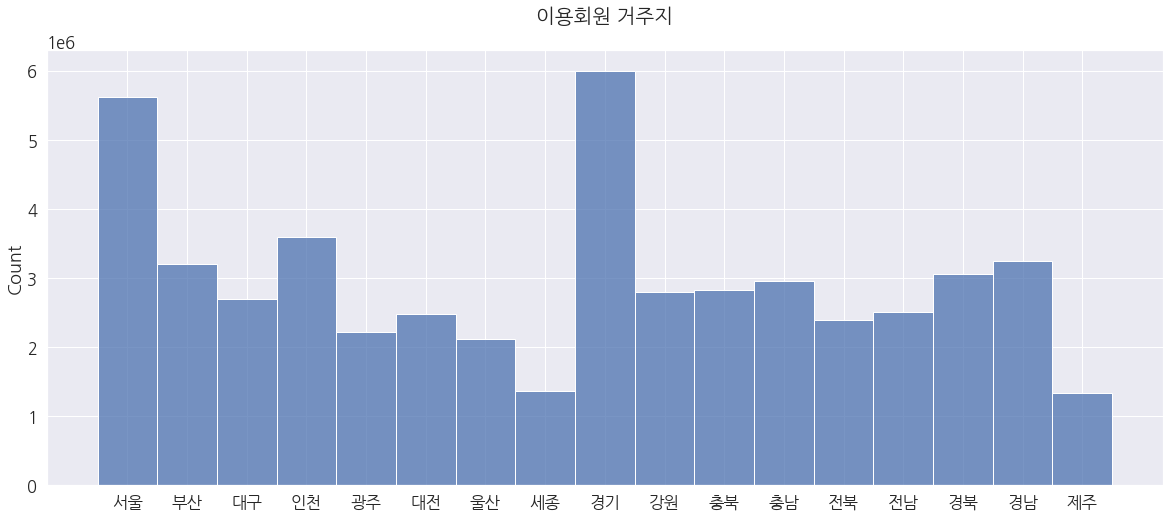

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="v1")
ax.set_title('이용회원 거주지\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

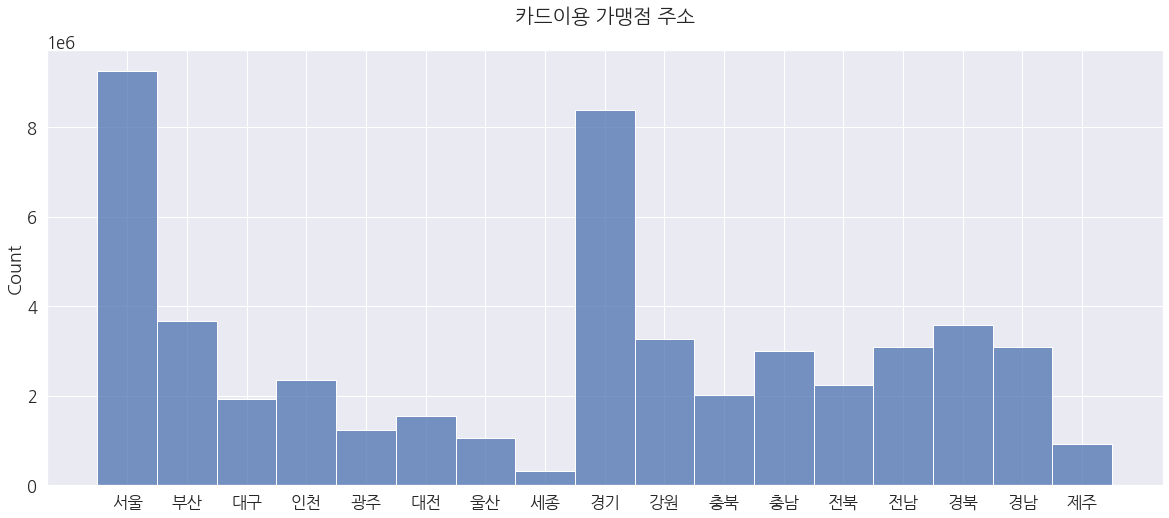

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="v2")
ax.set_title('카드이용 가맹점 주소\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

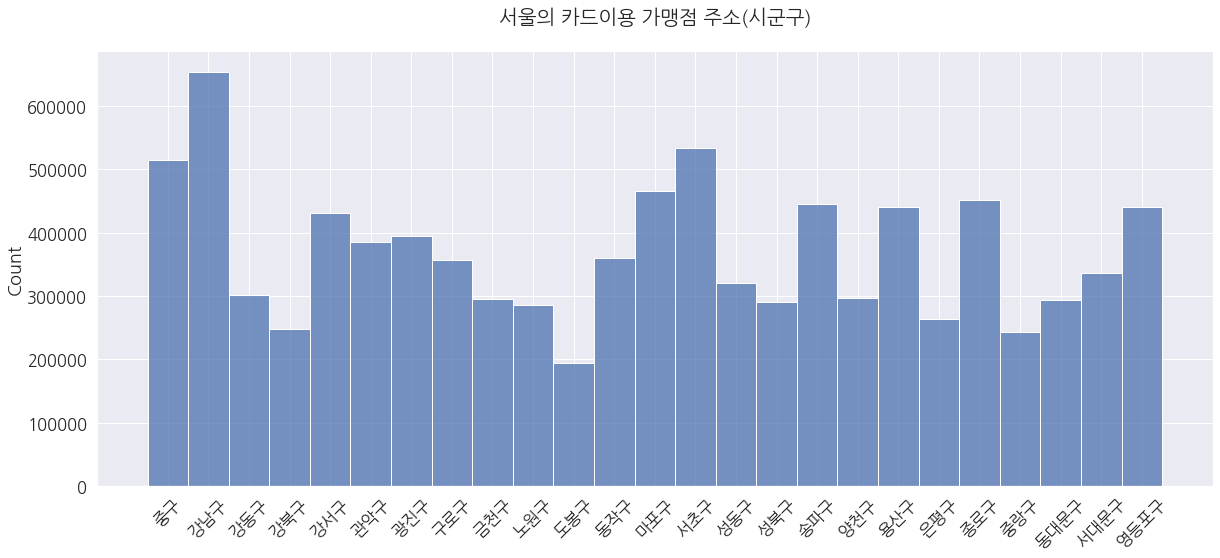

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
ax = sns.histplot(data=DATA[DATA['v2']=='서울'], x="v3")
ax.set_title('서울의 카드이용 가맹점 주소(시군구)\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

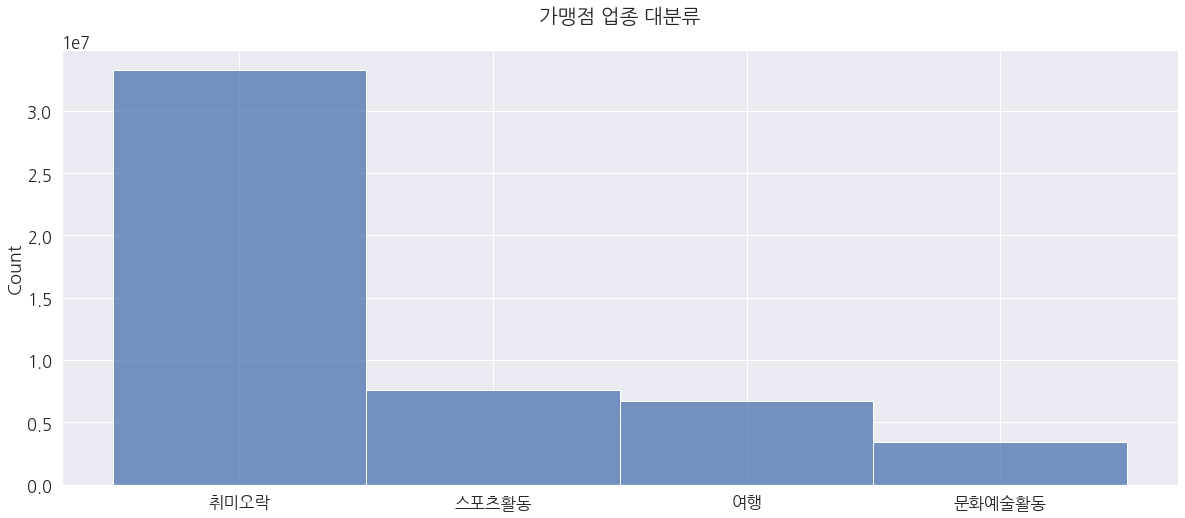

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="gb3")
ax.set_title('가맹점 업종 대분류\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

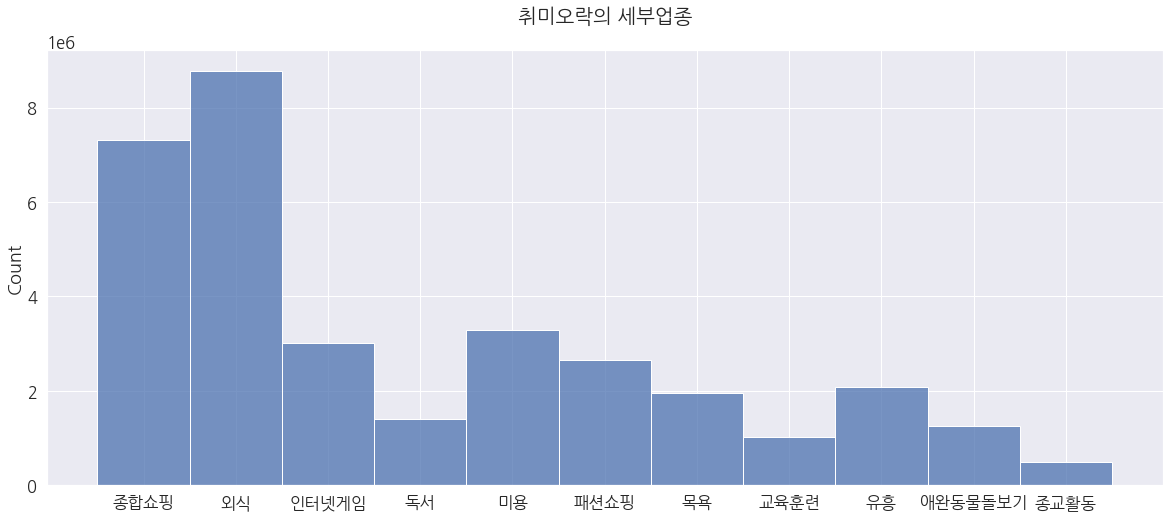

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='취미오락'], x="gb2")
ax.set_title('취미오락의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

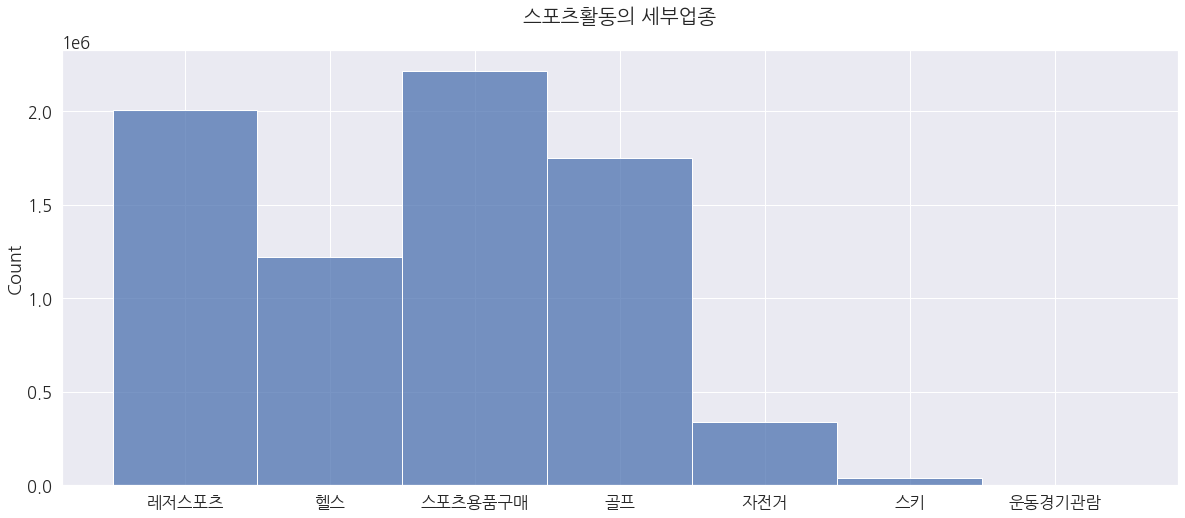

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='스포츠활동'], x="gb2")
ax.set_title('스포츠활동의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

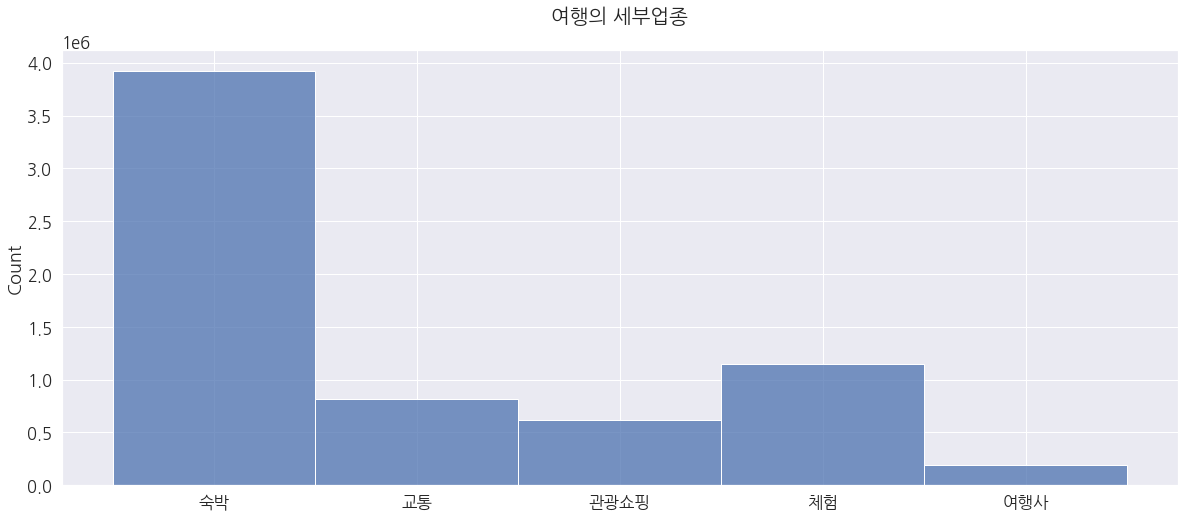

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='여행'], x="gb2")
ax.set_title('여행의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

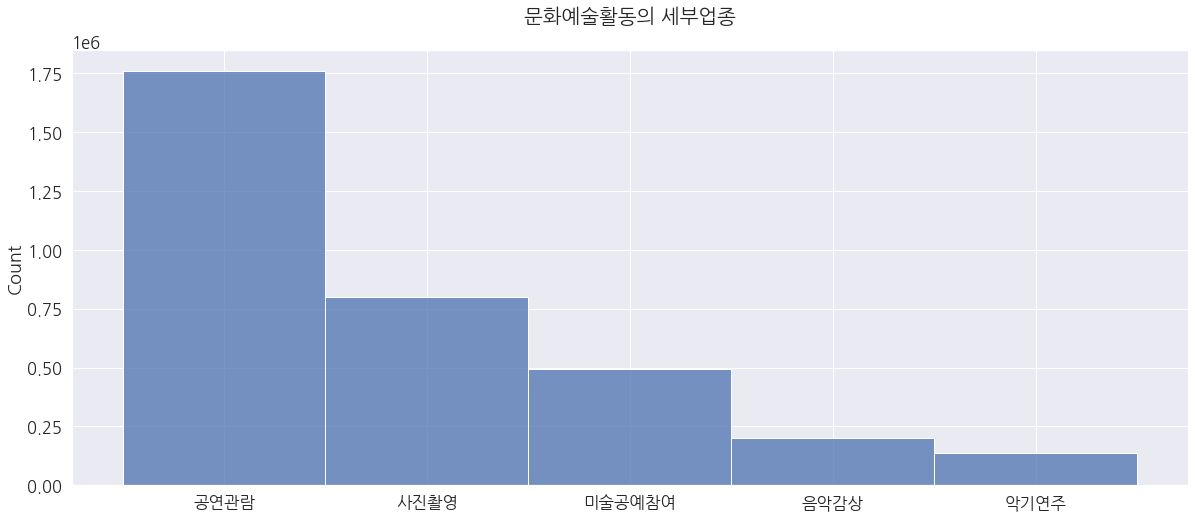

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='문화예술활동'], x="gb2")
ax.set_title('문화예술활동의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

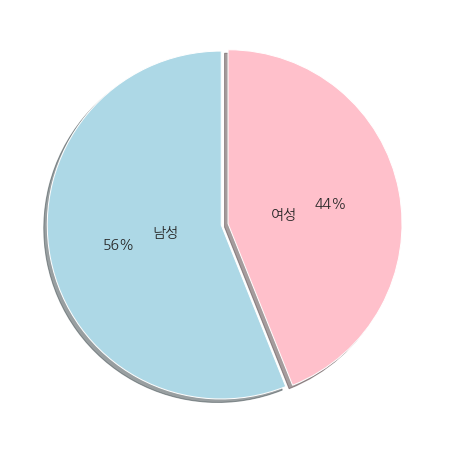

In [ ]:
# declaring data
data = [28531926, 22373206]
keys = ['남성', '여성']
colors = ['lightblue', 'pink']
explode = [0.02, 0.02]

plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
plt.pie(data, labels=keys, colors=colors, autopct='%.0f%%', shadow=True, explode=explode, 
        startangle=90, labeldistance=0.25, textprops={'fontsize': 14})  # plotting data on chart
plt.show()

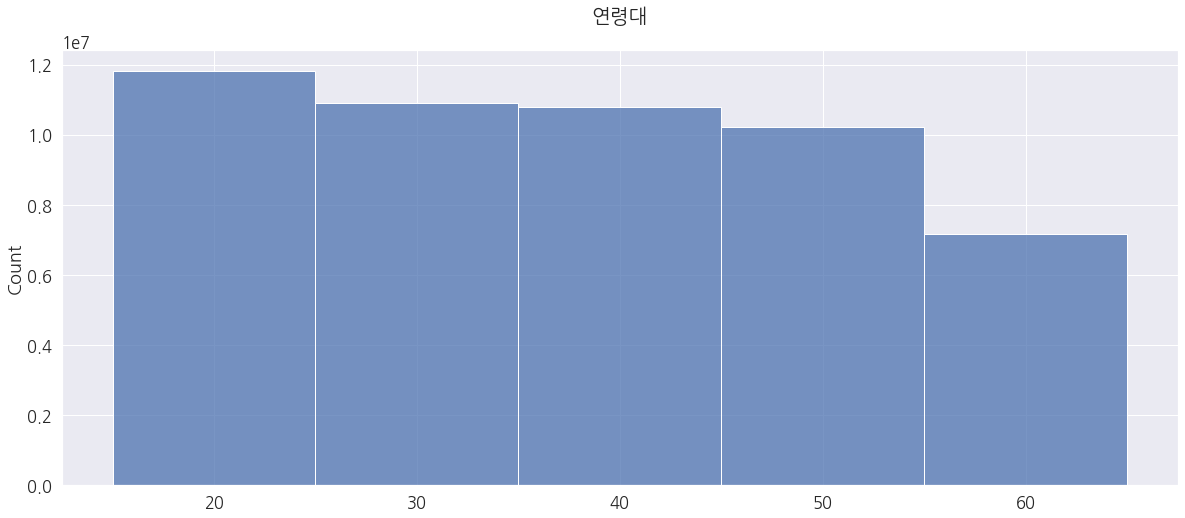

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="cln_age_r")
ax.set_title('연령대\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

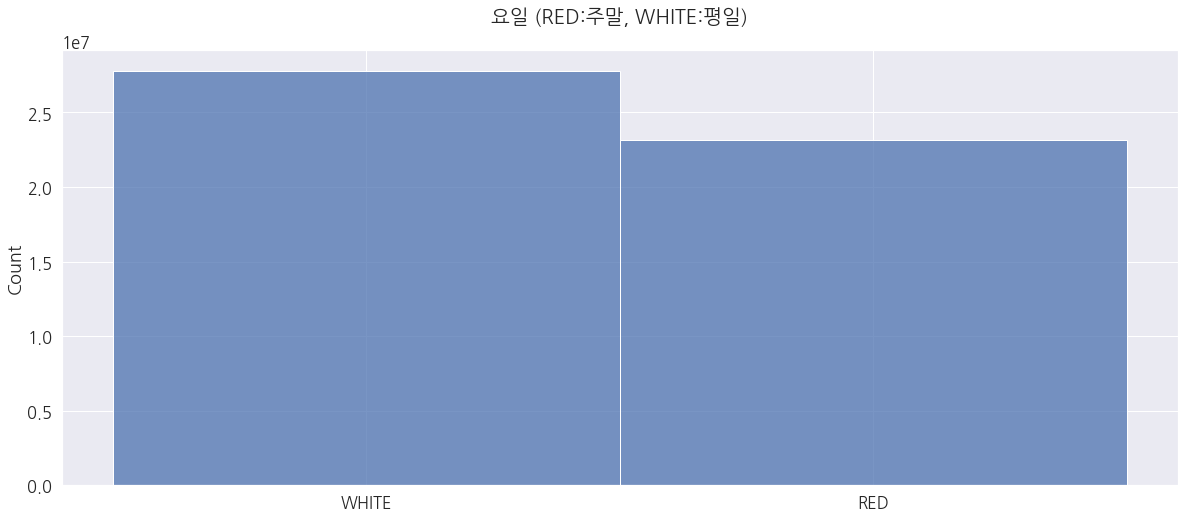

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="daw_ccd_r")
ax.set_title('요일 (RED:주말, WHITE:평일)\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

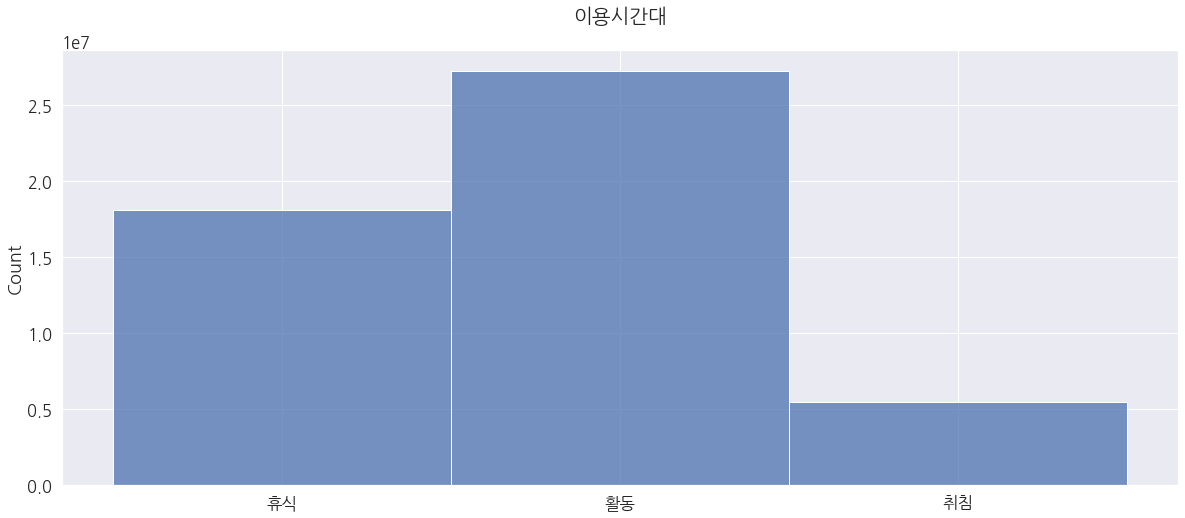

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="apv_ts_dl_tm_r")
ax.set_title('이용시간대\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

# 연속형 변수

In [ ]:
DATA[['vlm', 'usec']].describe()

,vlm,usec
count,"50,905,131","50,905,131"
mean,"29,564,409",797
std,"2,238,079,477","9,570"
min,0,4
25%,"165,400",5
50%,"669,410",20
75%,"3,265,000",84
max,"7,486,213,000,000","1,978,988"


In [ ]:
# 성별에 따른 취급액과 이용건수

DATA.groupby('sex_ccd')[['vlm', 'usec']].describe().transpose()

sex_ccd                    F                 M
vlm  count        22,373,206        28,531,925
     mean         34,856,315        25,414,781
     std       2,919,210,805     1,501,471,818
     min                   0                 0
     25%             161,414           168,700
     50%             656,058           682,490
     75%           3,193,750         3,319,609
     max   7,486,213,000,000 4,912,159,000,000
usec count        22,373,206        28,531,925
     mean                904               713
     std              11,434             7,802
     min                   4                 4
     25%                   5                 5
     50%                  19                20
     75%                  81                86
     max           1,978,988         1,386,869

In [ ]:
# 연령대에 따른 취급액과 이용건수

DATA.groupby('cln_age_r')[['vlm', 'usec']].describe().transpose()

cln_age_r                 20                30                40  \
vlm  count        11,813,988        10,910,086        10,794,497   
     mean         21,018,880        35,991,196        40,616,117   
     std       3,246,625,242     2,384,863,077     2,484,043,349   
     min                   0                 0                 0   
     25%             126,175           167,097           195,900   
     50%             485,998           686,866           811,200   
     75%           2,361,100         3,439,760         4,028,900   
     max   7,380,054,000,000 4,554,263,763,120 7,486,213,000,000   
usec count        11,813,988        10,910,086        10,794,497   
     mean                799               947               956   
     std               9,129            12,272            11,222   
     min                   4                 4                 4   
     25%                   5                 5                 5   
     50%                  20                20                20   
     75%                  93                90                90   
     max           1,293,649         1,978,988         1,696,817   

cln_age_r               50             60  
vlm  count      10,214,738      7,171,822  
     mean       28,004,325     19,452,364  
     std       387,799,271    190,026,090  
     min                 0              0  
     25%           183,520        182,880  
     50%           763,900        690,346  
     75%         3,677,410      3,024,300  
     max   766,682,539,931 25,669,398,800  
usec count      10,214,738      7,171,822  
     mean              686            486  
     std             7,056          4,800  
     min                 4              4  
     25%                 5              5  
     50%                19             15  
     75%                81             63  
     max         1,052,763        604,594

In [ ]:
# 가맹점 업종 대분류에 따른 취급액과 이용건수

DATA.groupby('gb3')[['vlm', 'usec']].describe().transpose()

gb3                 문화예술활동           스포츠활동             여행              취미오락
vlm  count       3,389,163       7,560,859      6,700,860        33,254,249
     mean        2,283,141       7,089,750      8,088,035        41,782,354
     std       109,837,442     396,683,339     78,798,050     2,762,067,035
     min                 0               0              0                 0
     25%            74,100         173,394        204,400           177,200
     50%           195,600         629,187        559,545           817,600
     75%           802,750       2,656,665      2,098,014         4,179,980
     max   182,147,461,819 766,682,539,931 49,588,695,200 7,486,213,000,000
usec count       3,389,163       7,560,859      6,700,860        33,254,249
     mean               96              81            152             1,161
     std               721             297          1,461            11,803
     min                 4               4              4                 4
     25%                 5               5              5                 9
     50%                10              10             10                25
     75%                30              36             36               127
     max            86,867          17,803        163,086         1,978,988

In [ ]:
# 취미오락의 소분류에 따른 취급액과 이용건수

DATA[DATA['gb3']=='취미오락'].groupby('gb2')[['vlm', 'usec']].describe().transpose()

gb2                     교육훈련            독서            목욕             미용  \
vlm  count         1,019,229     1,405,948     1,961,445      3,291,622   
     mean         50,205,371     4,606,375     1,123,751     12,167,997   
     std       1,630,701,065    24,127,461     4,739,712     65,354,732   
     min                   0             0             0              0   
     25%             816,000        93,400        51,100        182,013   
     50%           2,935,500       287,300       123,750        634,680   
     75%          12,705,882     1,549,890       465,010      2,617,312   
     max   1,621,064,465,600 5,336,701,800 1,444,691,905 10,742,837,800   
usec count         1,019,229     1,405,948     1,961,445      3,291,622   
     mean                176           144            64            211   
     std                 932           740           228          1,022   
     min                   4             4             4              4   
     25%                   5             5             5              5   
     50%                  10            10            10             14   
     75%                  46            50            29             41   
     max              54,821        53,377         8,732         43,234   

gb2              애완동물돌보기                외식             유흥          인터넷게임  \
vlm  count     1,249,062         8,771,256      2,092,300      3,011,031   
     mean      6,327,585        41,167,764      6,942,109     10,244,054   
     std      23,638,666     5,089,710,879     46,776,477    118,361,397   
     min               0                 0              0              0   
     25%         167,310           405,600        202,000         49,500   
     50%         528,885         1,626,963        729,350        167,890   
     75%       2,884,450         6,703,828      2,982,836        958,600   
     max   4,638,103,042 7,486,213,000,000 42,192,108,175 32,364,697,100   
usec count     1,249,062         8,771,256      2,092,300      3,011,031   
     mean            100             1,773             79            639   
     std             321            12,388            301          4,827   
     min               4                 4              4              4   
     25%               5                16              5             10   
     50%              10                66             10             25   
     75%              45               293             35            112   
     max           9,414           987,059         12,540        432,329   

gb2                 종교활동              종합쇼핑           패션쇼핑  
vlm  count       497,502         7,307,897      2,646,957  
     mean      2,369,877       114,209,880     14,868,901  
     std      10,984,164     1,798,191,733     80,908,172  
     min               0                 0              0  
     25%          76,650           284,768        224,840  
     50%         250,000         1,277,545        844,740  
     75%       1,068,100         7,037,128      3,895,852  
     max   2,097,236,900 3,970,852,000,000 10,454,100,803  
usec count       497,502         7,307,897      2,646,957  
     mean             24             2,614            205  
     std              54            20,840          1,069  
     min               4                 4              4  
     25%               5                15              5  
     50%              10                51             15  
     75%              20               231             55  
     max           2,076         1,978,988        112,967

In [ ]:
# 요일에 따른 취급액과 이용건수

DATA.groupby('daw_ccd_r')[['vlm', 'usec']].describe().transpose()

daw_ccd_r                RED             WHITE
vlm  count        23,136,951        27,768,180
     mean         19,612,861        37,856,220
     std       1,202,840,262     2,824,343,723
     min                   0                 0
     25%             151,800           179,640
     50%             579,220           760,760
     75%           2,690,366         3,827,700
     max   3,606,956,625,548 7,486,213,000,000
usec count        23,136,951        27,768,180
     mean                530             1,020
     std               5,225            12,043
     min                   4                 4
     25%                   5                 5
     50%                  16                20
     75%                  72                96
     max             764,383         1,978,988

In [ ]:
# 이용시간대에 따른 취급액과 이용건수

DATA.groupby('apv_ts_dl_tm_r')[['vlm', 'usec']].describe().transpose()

apv_ts_dl_tm_r                취침                활동                휴식
vlm  count             5,508,638        27,261,695        18,134,798
     mean              6,487,642        36,171,095        26,642,519
     std           1,043,407,145     2,100,789,818     2,663,658,141
     min                       0                 0                 0
     25%                  97,090           180,492           175,864
     50%                 331,078           811,800           648,108
     75%               1,318,000         4,103,000         2,937,051
     max       2,445,035,000,000 7,380,054,000,000 7,486,213,000,000
usec count             5,508,638        27,261,695        18,134,798
     mean                    148             1,014               668
     std                   1,268            11,625             7,297
     min                       4                 4                 4
     25%                       5                 5                 5
     50%                      10                20                19
     75%                      36               105                76
     max                 122,314         1,978,988         1,059,826

In [ ]:
# 카드이용 가맹점 주소(시도)에 따른 취급액과 이용건수

DATA.groupby('v2')[['vlm', 'usec']].describe().transpose()

v2                        서울             부산             대구                인천  \
vlm  count         9,245,771      3,672,656      1,927,718         2,350,887   
     mean         80,102,412     14,331,258     17,964,668        21,607,157   
     std       3,959,134,419    129,116,144    165,823,472     1,720,750,216   
     min                   0              0              0                 0   
     25%             217,852        152,700        164,672           180,900   
     50%           1,185,624        612,565        643,710           736,000   
     75%           7,673,082      2,858,008      2,976,844         3,400,378   
     max   7,380,054,000,000 52,147,104,092 16,764,423,035 2,629,914,000,000   
usec count         9,245,771      3,672,656      1,927,718         2,350,887   
     mean              1,954            401            539               702   
     std              17,407          3,058          4,178             5,486   
     min                   4              4              4                 4   
     25%                   9              5              5                 5   
     50%                  30             16             19                20   
     75%                 195             70             78                90   
     max           1,710,513        162,644        222,958           206,376   

v2                     광주            대전                울산             세종  \
vlm  count      1,236,318     1,555,148         1,049,366        309,895   
     mean      17,079,430    19,561,274        21,336,398     12,427,853   
     std      128,771,597   134,045,761     7,308,683,901     97,665,300   
     min                0             0                 0              0   
     25%          169,395       164,820           156,297        172,400   
     50%          668,250       687,200           595,561        701,100   
     75%        3,028,053     3,581,120         2,628,564      3,188,882   
     max   10,077,006,600 7,415,762,500 7,486,213,000,000 32,924,181,933   
usec count      1,236,318     1,555,148         1,049,366        309,895   
     mean             487           659               447            445   
     std            3,598         4,495             3,284          3,154   
     min                4             4                 4              4   
     25%                5             5                 5              5   
     50%               19            20                15             20   
     75%               76            95                70             80   
     max          103,055       169,136           101,407         98,730   

v2                        경기             강원                충북              충남  \
vlm  count         8,387,264      3,256,461         2,020,636       2,998,042   
     mean         38,945,569      9,453,680        16,916,196       9,168,485   
     std       1,014,460,651     72,609,277     2,850,503,285     337,812,464   
     min                   0              0                 0               0   
     25%             184,616        145,635           153,300         146,450   
     50%             781,830        523,775           564,896         530,400   
     75%           3,853,504      2,250,700         2,414,178       2,284,400   
     max   2,551,583,823,956 19,380,000,000 3,970,852,000,000 566,568,756,002   
usec count         8,387,264      3,256,461         2,020,636       2,998,042   
     mean              1,150            292               491             296   
     std              12,908          2,572             6,724           2,798   
     min                   4              4                 4               4   
     25%                   5              5                 5               5   
     50%                  20             15                15              15   
     75%                 101             60                66              61   
     max           1,978,988        195,217       

In [ ]:
# 강원도의 카드이용 가맹점 주소(시군구)에 따른 취급액과 이용건수

DATA[DATA['v2']=='강원'].groupby('v3')[['vlm', 'usec']].describe().transpose()

v3                   강릉시           고성군           동해시           삼척시  \
vlm  count       313,000       133,860       202,263       169,934   
     mean     15,093,219     3,839,630     6,682,997     6,668,850   
     std      81,682,468    13,565,469    35,881,918    29,186,231   
     min               0            10             0             0   
     25%         178,800       106,379       147,610       160,960   
     50%         707,168       378,140       511,700       596,190   
     75%       3,362,218     1,534,500     2,022,965     2,486,006   
     max   3,045,291,444 1,198,070,250 3,625,538,500 2,549,848,500   
usec count       313,000       133,860       202,263       169,934   
     mean            447            93           191           169   
     std           2,860           332         1,134           825   
     min               4             4             4             4   
     25%               5             5             5             5   
     50%              20            14            15            15   
     75%              81            40            50            51   
     max          70,456         8,229        28,401        14,791   

v3                   속초시         양구군           양양군           영월군  \
vlm  count       265,863      88,709       161,952       119,199   
     mean      9,775,981   2,205,143     4,106,742     3,405,687   
     std      43,730,039   9,760,267    15,868,152    17,025,596   
     min               0          20             0             0   
     25%         153,894      98,200       130,200       122,640   
     50%         598,800     284,480       446,100       391,930   
     75%       2,657,200   1,022,000     1,699,848     1,443,984   
     max   2,589,087,105 973,233,651 2,020,896,375 3,523,987,695   
usec count       265,863      88,709       161,952       119,199   
     mean            259          82           111           114   
     std           1,307         345           429           480   
     min               4           4             4             4   
     25%               5           5             5             5   
     50%              15          10            15            10   
     75%              61          30            44            40   
     max          28,237       8,119         9,119         9,698   

v3                   원주시         인제군           정선군           철원군  \
vlm  count       323,931     116,634       155,863       128,219   
     mean     20,243,916   3,200,125     3,977,828     2,745,319   
     std     140,297,289  12,167,204    23,802,412    15,877,904   
     min               0           0            20             5   
     25%         173,250     103,102       177,226        96,006   
     50%         732,105     339,332       574,875       304,200   
     75%       3,507,225   1,222,579     2,158,456     1,158,344   
     max   6,925,155,878 611,155,591 4,731,921,747 4,399,559,000   
usec count       323,931     116,634       155,863       128,219   
     mean            650         149            94            96   
     std           4,809         602           361           393   
     min               4           4             4             4   
     25%               5           5             5             5   
     50%              20          14            15            10   
     75%              98          45            45            35   
     max         123,067      12,522         9,637         8,925   

v3                    춘천시           태백시           평창군           홍천군  \
vlm  count        313,677       130,058       197,810       200,980   
     mean      22,301,036     5,335,788     5,008,814     8,422,084   
     std      148,663,442    23,942,957    21,822,646    33,689,724   
     min                0             0             0             0   
     25%          160,208       178,150       138,880       182,324   
     50%          669,240       544,500       503,000       714,894  

In [ ]:
# 제주의 카드이용 가맹점 주소(시군구)에 따른 취급액과 이용건수

DATA[DATA['v2']=='제주'].groupby('v3')[['vlm', 'usec']].describe().transpose()

v3                  서귀포시           제주시
vlm  count       376,962       541,328
     mean     14,222,492    27,111,556
     std      66,581,793   141,167,306
     min               0             0
     25%         253,293       299,400
     50%       1,189,607     1,522,524
     75%       5,785,746     9,601,536
     max   4,666,519,911 7,988,161,034
usec count       376,962       541,328
     mean            300           602
     std           1,683         4,495
     min               4             4
     25%               9            10
     50%              25            29
     75%              98           143
     max          48,184       156,580

In [ ]:
# 서울 사람의 카드이용 가맹점 주소(시도)에 따른 취급액과 이용건수

DATA[DATA['v1']=='서울'].groupby('v2')[['vlm', 'usec']].describe().transpose()

v2                        서울            부산          대구            인천  \
vlm  count         1,368,109       311,662     158,356       298,331   
     mean        234,269,969     5,427,110   4,231,878    12,799,526   
     std       6,456,854,650    20,479,586  14,282,154    57,915,152   
     min                   0             0           0             0   
     25%           1,262,200       136,400     142,520       244,500   
     50%           7,609,900       561,706     551,880     1,063,015   
     75%          46,044,455     2,963,800   2,651,206     5,396,752   
     max   4,912,159,000,000 1,536,000,000 872,256,920 5,038,078,122   
usec count         1,368,109       311,662     158,356       298,331   
     mean              6,550           140         142           378   
     std              34,610           451         425         1,591   
     min                   4             4           4             4   
     25%                  31             5           5            10   
     50%                 188            15          15            29   
     75%                 908            74          64           111   
     max           1,710,513        15,782       8,779        64,837   

v2                  광주            대전          울산          세종             경기  \
vlm  count     113,369       127,773      79,870      28,083      1,122,025   
     mean    3,940,129    26,443,185   2,645,295   6,432,966     43,857,422   
     std    11,091,793   215,002,159   6,512,984  17,545,206    690,576,573   
     min             0             0           0         503              0   
     25%       145,300       155,855     124,600     163,488        316,820   
     50%       578,840       635,700     481,120     635,500      1,546,650   
     75%     2,798,400     3,287,895   2,223,449   3,208,401      8,498,500   
     max   783,000,000 6,458,000,000 235,429,000 321,775,524 81,488,934,500   
usec count     113,369       127,773      79,870      28,083      1,122,025   
     mean          129           866          94         287          1,131   
     std           355         6,320         243       1,108         14,506   
     min             4             4           4           4              4   
     25%             5             5           5           5             10   
     50%            15            20          14          19             40   
     75%            58            77          60          59            170   
     max         7,519       163,086       5,191      27,655      1,663,639   

v2                    강원              충북            충남            전북  \
vlm  count       392,939         193,571       292,249       211,208   
     mean      9,399,645       9,968,225     5,221,652     4,667,567   
     std      34,896,187   1,742,603,215    18,248,664    24,476,850   
     min               0               0             0             0   
     25%         173,600         165,466       150,700       150,300   
     50%         735,840         679,635       583,050       591,600   
     75%       4,051,566       3,247,424     2,882,899     2,611,307   
     max   4,399,559,000 766,590,978,440 2,971,138,500 1,678,645,530   
usec count       392,939         193,571       292,249       211,208   
     mean            277             205           211           141   
     std           1,117             816           930           562   
     min               4               4             4             4   
     25%               9               5             5             5   
     50%              24              20            19            15   
     75%             106              83            74            66   
     max          48,069          32,488        53,597        17,988   

v2                    전남            경북            경남            제주  
vlm  count       284,294       303,786       252,194        84,846  
     mean      2,858,367     2,887,923     3,017,803    37,593,282  

In [ ]:
# 부산 사람의 카드이용 가맹점 주소(시도)에 따른 취급액과 이용건수

DATA[DATA['v1']=='부산'].groupby('v2')[['vlm', 'usec']].describe().transpose()

v2                     서울             부산          대구          인천          광주  \
vlm  count        488,871        722,599     116,809      97,069      49,039   
     mean      54,184,870     53,647,521   2,477,749   1,684,333   1,245,397   
     std      403,267,232    278,809,429   7,930,064   5,072,728   3,199,098   
     min                0              0           0           0          15   
     25%          161,353        587,860     132,840     121,257     120,720   
     50%          825,968      2,902,712     491,643     408,800     409,000   
     75%        5,005,213     15,904,071   1,980,825   1,419,214   1,323,592   
     max   20,114,118,943 52,147,104,092 440,915,300 363,608,100 234,349,440   
usec count        488,871        722,599     116,809      97,069      49,039   
     mean           1,139          1,584          84          47          41   
     std            7,464          6,550         229         112          75   
     min                4              4           4           4           4   
     25%                5             19           5           5           5   
     50%               20             71          15          10          10   
     75%              127            304          56          40          40   
     max          311,290        162,644       7,965       2,514       1,289   

v2                    대전            울산          세종             경기          강원  \
vlm  count        60,793       100,910      12,324        373,781     138,493   
     mean     11,899,129     4,829,822   1,642,388     13,659,187   1,160,509   
     std      71,511,288    15,823,093   4,918,667    229,245,380   2,729,890   
     min             101             0          51              0           0   
     25%         116,900       150,155     110,376        124,806     106,050   
     50%         416,204       562,818     437,745        444,400     349,500   
     75%       1,770,358     2,799,273   1,828,444      1,691,600   1,120,470   
     max   1,374,150,898 2,000,340,923 437,600,000 15,396,381,400 267,135,424   
usec count        60,793       100,910      12,324        373,781     138,493   
     mean            335           156          69            303          38   
     std           1,812           512         154          4,552          84   
     min               4             4           4              4           4   
     25%               5             5           5              5           5   
     50%              14            15          10             14          10   
     75%              55            63          59             46          30   
     max          30,436         8,831       2,306        302,297       2,034   

v2                  충북          충남          전북            전남            경북  \
vlm  count      79,925     109,899      87,992       149,156       228,929   
     mean    1,190,896   1,352,498   1,261,290     1,314,586     2,402,408   
     std     4,495,359   5,086,916   4,854,049     8,861,709     9,310,889   
     min            25           0          14             0             0   
     25%       110,220     103,488     103,000       116,881       124,000   
     50%       357,700     331,700     326,870       364,316       434,130   
     75%     1,118,695   1,044,434     994,937     1,112,930     1,601,900   
     max   789,712,753 275,473,666 363,742,200 3,061,071,731 2,127,341,604   
usec count      79,925     109,899      87,992       149,156       228,929   
     mean           51          45          35            41            95   
     std           128         124          83           112           338   
     min             4           4           4             4             4   
     25%             5           5           5             5             5   
     50%            10          10          10            10            15   
     75%            39          34          30            30            49   
     max     

In [ ]:
# 강원도 사람의 카드이용 가맹점 주소(시도)에 따른 취급액과 이용건수

DATA[DATA['v1']=='강원'].groupby('v2')[['vlm', 'usec']].describe().transpose()

v2                     서울          부산            대구          인천          광주  \
vlm  count        529,940     127,225        73,718     119,540      39,781   
     mean      26,672,990   1,197,101     1,322,496   2,076,727     917,377   
     std      188,904,430   3,517,940     6,537,947   6,827,135   2,236,344   
     min                0           0             0           0          10   
     25%          165,990     102,300       111,540     129,200     107,310   
     50%          792,050     333,427       352,860     455,784     326,950   
     75%        4,331,747   1,045,887     1,141,394   1,750,202     944,328   
     max   10,795,878,440 330,317,145 1,044,077,100 235,981,238 126,299,200   
usec count        529,940     127,225        73,718     119,540      39,781   
     mean             603          31            43          60          31   
     std            3,461          63            95         148          59   
     min                4           4             4           4           4   
     25%                5           5             5           5           5   
     50%               20          10            10          14          10   
     75%              110          30            39          45          30   
     max          154,395       1,848         2,241       4,099       1,035   

v2                  대전          울산          세종            경기             강원  \
vlm  count      64,518      33,036      11,123       501,583        601,193   
     mean    5,269,890     832,051   1,569,576     8,877,608     33,701,788   
     std    26,037,036   2,587,149   3,545,526   121,220,184    161,360,679   
     min           495          20         187             0              0   
     25%       120,088     108,020     108,680       147,600        319,150   
     50%       409,468     321,815     443,760       544,500      1,633,500   
     75%     1,738,754     880,286   1,740,470     2,485,122     10,193,428   
     max   756,457,317 259,982,600 148,918,021 8,800,311,300 19,380,000,000   
usec count      64,518      33,036      11,123       501,583        601,193   
     mean          314          28          59           211          1,043   
     std         1,708          47         125         2,397          5,754   
     min             4           4           4             4              4   
     25%             5           5           5             5             10   
     50%            14          10          10            15             40   
     75%            56          30          51            59            219   
     max        36,002         823       1,331       168,037        195,217   

v2                    충북          충남          전북          전남            경북  \
vlm  count       113,757     115,604      74,464      93,268       160,821   
     mean      2,886,304   1,296,329     994,146     686,052     1,171,775   
     std      13,601,238   3,805,357   3,145,406   1,454,121    10,955,465   
     min               0          49          50           0             0   
     25%         144,400     111,500      98,400      95,950       106,050   
     50%         480,500     350,700     280,014     260,230       343,728   
     75%       1,842,200   1,135,349     802,535     689,850     1,087,171   
     max   3,755,000,000 187,686,400 234,985,500 146,846,700 4,217,649,200   
usec count       113,757     115,604      74,464      93,268       160,821   
     mean             92          44          30          22            42   
     std             289         138          76          49           100   
     min               4           4           4           4             4   
     25%               5           5           5           5             5   
     50%              15          10          10          10            10   
     75%              45          35          25          20            35   
     max           9,949       6,061       1,958       2,355    

# 시계열 시각화

In [ ]:
# 년월에 따른 취급액과 이용건수의 통계량

DATA.groupby('ta_ym').describe()

vlm                                                         \
               count       mean           std min     25%     50%       75%   
ta_ym                                                                         
2018-01-01   970,629 31,637,461 4,999,257,024   0 166,940 649,102 3,246,148   
2018-02-01   958,501 26,928,815 2,517,651,527   0 166,260 638,145 3,138,157   
2018-03-01 1,011,310 38,491,663 8,827,122,505   0 172,200 692,194 3,384,603   
2018-04-01 1,020,174 30,517,505 3,598,403,383   0 170,971 677,040 3,297,904   
2018-05-01 1,063,169 27,537,862 1,490,450,236   0 171,913 678,150 3,291,750   
2018-06-01 1,039,993 27,672,935 2,445,498,502   0 167,960 665,763 3,230,760   
2018-07-01 1,053,759 26,609,559   368,980,932   0 172,900 677,521 3,309,800   
2018-08-01 1,064,948 25,449,552   353,740,089   0 170,430 666,900 3,270,280   
2018-09-01 1,063,604 25,340,641   324,463,322   0 168,413 663,144 3,246,983   
2018-10-01 1,032,298 30,548,242 3,923,899,214   0 168,640 669,600 3,297,408   
2018-11-01 1,009,142 34,319,603 7,460,368,026   0 166,167 668,660 3,308,370   
2018-12-01 1,017,821 28,403,048   347,963,578   0 171,020 679,754 3,470,700   
2019-01-01   990,052 28,213,275   368,266,954   0 165,990 655,283 3,332,878   
2019-02-01 1,000,523 24,840,474   311,836,410   0 164,481 648,115 3,204,110   
2019-03-01 1,039,306 27,894,737   360,213,786   0 171,700 691,850 3,433,495   
2019-04-01 1,019,752 26,663,982   351,536,380   0 164,268 666,705 3,295,500   
2019-05-01 1,067,870 27,023,000   359,616,307   0 164,829 666,330 3,294,075   
2019-06-01 1,063,918 25,572,445   317,991,749   0 160,320 651,300 3,230,949   
2019-07-01 1,053,670 31,020,052 4,450,977,363   0 164,956 662,860 3,289,000   
2019-08-01 1,106,414 25,698,467   332,409,698   0 167,310 669,240 3,332,511   
2019-09-01 1,039,149 26,312,448   345,509,060   0 161,600 653,470 3,206,245   
2019-10-01 1,053,648 29,520,198 2,518,726,370   0 163,200 663,000 3,301,740   
2019-11-01 1,035,821 27,782,303   381,683,833   0 162,240 666,198 3,332,004   
2019-12-01 1,024,649 33,460,037 3,627,001,479   0 164,697 669,500 3,438,140   
2020-01-01 1,015,403 27,683,356   372,982,378   0 160,650 642,090 3,248,190   
2020-02-01   904,508 26,697,425   368,109,577   0 158,350 626,200 3,022,466   
2020-03-01   827,245 29,366,635   417,885,356   0 170,000 655,000 3,132,500   
2020-04-01   871,036 28,568,759   393,955,052   0 172,040 680,367 3,229,292   
2020-05-01   987,854 29,456,131   383,818,281   0 178,850 715,400 3,442,096   
2020-06-01   960,942 28,460,227   405,857,816   0 168,630 679,630 3,244,850   
2020-07-01   996,978 27,781,060   399,565,290   0 167,970 666,790 3,178,705   
2020-08-01 1,022,177 27,935,326   853,528,416   0 168,630 677,075 3,218,789   
2020-09-01   885,528 30,089,502   445,558,985   0 168,630 673,524 3,174,076   
2020-10-01 1,004,240 28,555,040   412,681,259   0 168,630 680,422 3,240,251   
2020-11-01   958,233 30,453,699   902,299,189   0 168,630 674,520 3,219,300   
2020-12-01   788,676 33,014,471   508,773,669   0 163,520 661,188 3,102,025   
2021-01-01   784,258 32,895,534   472,841,755   0 163,775 664,300 3,123,161   
2021-02-01   856,530 28,684,795   412,426,076   0 162,560 655,320 3,085,084   
2021-03-01   914,870 31,252,426   477,274,535   0 167,640 688,340 3,284,220   
2021-04-01   933,180 29,778,362   458,196,838   0 162,240 670,761 3,194,150   
2021-05-01   983,620 30,434,307   453,292,179   0 162,880 685,012 3,269,816   
2021-06-01   977,436 29,204,062   461,092,263   0 155,700 653,100 3,103,900   
2021-07-01   965,448 30,217,054   483,564,600   0 160,300 664,200 3,152,700   
2021-08-01   949,361 30,120,048   476,930,075   0 156,800 657,500 3,143,300   
2021-09-01   955,396 30,842,796   483,539,473   0 161,000 670,400 3,183,500   
2021-10-01   999,486 32,378,180   494,736,242   0 164,300 697,500 3,403,000   
2021-11-01   987,616 32,333,294   530,396,472   0 164,300 682,800 3,350,600   
2021-12-01   923,615 34,097,969   548,765,993   0 163,300 681,300 3

**평균이랑 중위수랑 차이가 매우 크다(최대값이 너무 큼). 중위수를 쓰는게 더 좋아보이기도 하다.**

**같은 년월에 여러 자료가 있으므로 이들의 중위수를 가지고 시계열을 그리자**

In [ ]:
DATA.groupby('ta_ym').median()

,vlm,usec
ta_ym,,
2018-01-01,"649,102",19
2018-02-01,"638,145",19
2018-03-01,"692,194",19
2018-04-01,"677,040",19
2018-05-01,"678,150",19
2018-06-01,"665,763",19
2018-07-01,"677,521",19
2018-08-01,"666,900",19
2018-09-01,"663,144",19


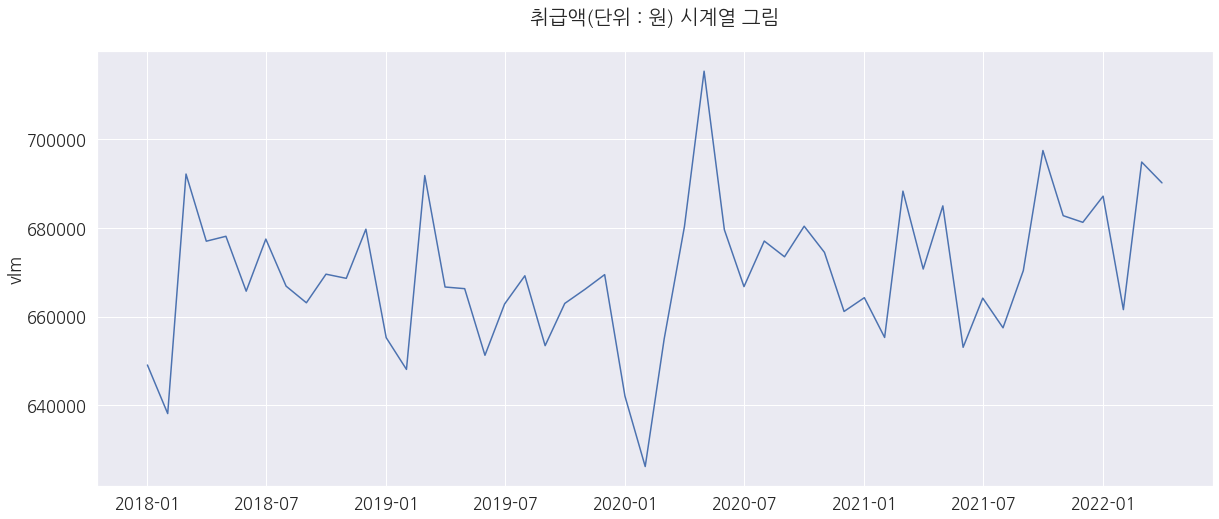

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=DATA.groupby('ta_ym').median(), x="ta_ym", y="vlm", ci=None)
ax.set_title('취급액(단위 : 원) 시계열 그림\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

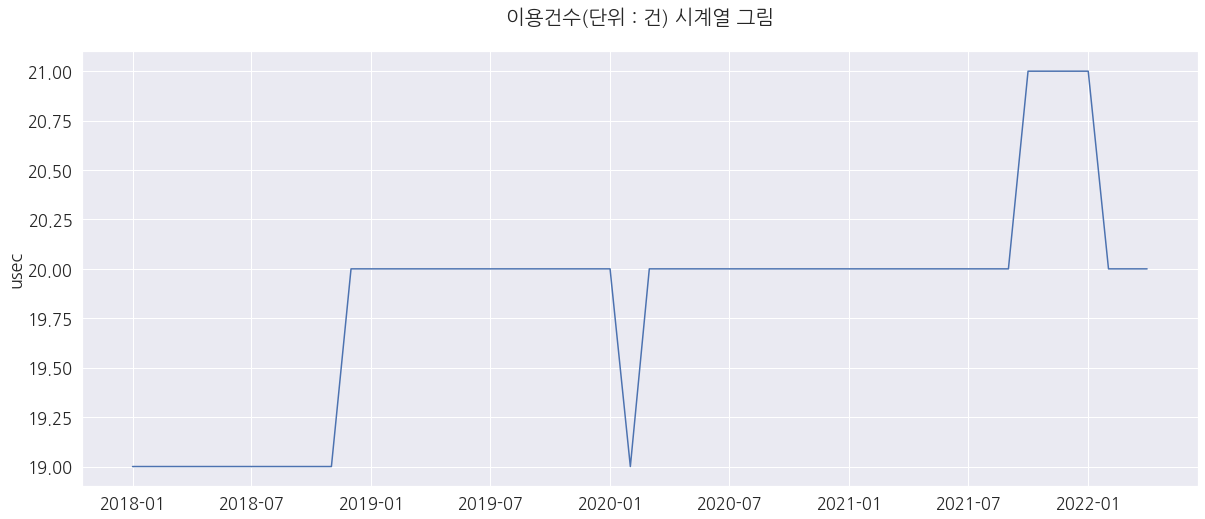

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=DATA.groupby('ta_ym').median(), x="ta_ym", y="usec", ci=None)
ax.set_title('이용건수(단위 : 건) 시계열 그림\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

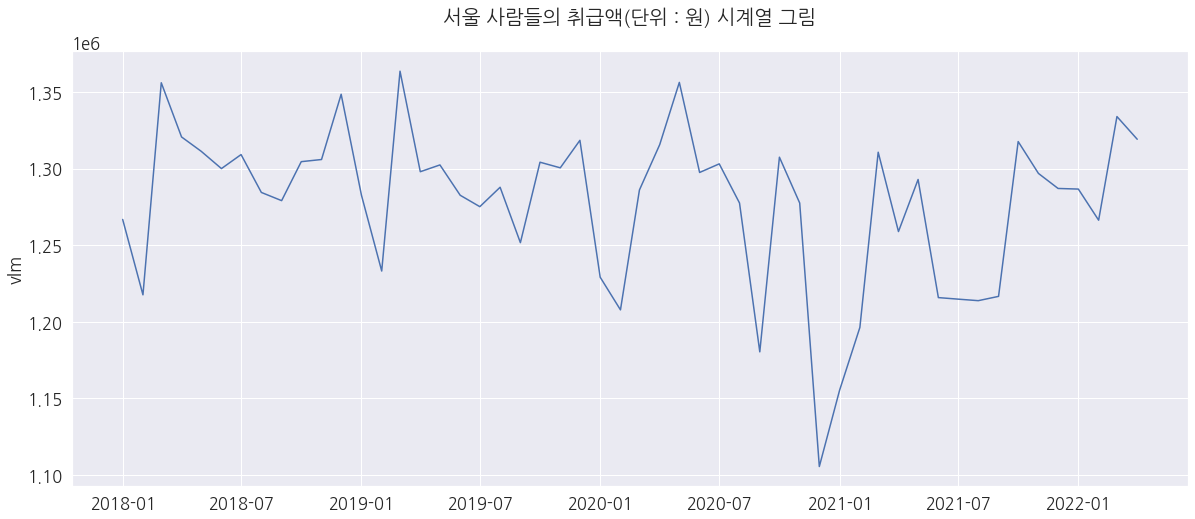

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=DATA[DATA['v1']=='서울'].groupby('ta_ym').median(), x="ta_ym", y="vlm", ci=None)
ax.set_title('서울 사람들의 취급액(단위 : 원) 시계열 그림\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

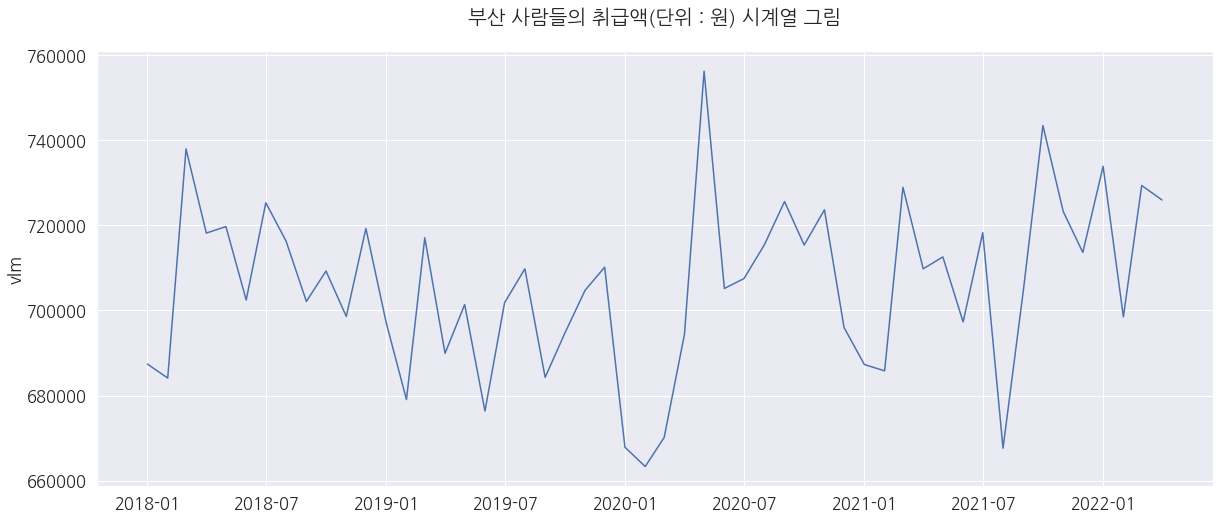

In [ ]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=DATA[DATA['v1']=='부산'].groupby('ta_ym').median(), x="ta_ym", y="vlm", ci=None)
ax.set_title('부산 사람들의 취급액(단위 : 원) 시계열 그림\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output